## 1. Libraries and dara import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV,StratifiedKFold

In [2]:
train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")

In [3]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


## 2. Data exploration and preaparation

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
train.groupby(["Pclass"],as_index=False)["Survived"].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
train.groupby(["Parch"],as_index=False)["Survived"].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [8]:
train.groupby(["Sex"],as_index=False)["Survived"].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train.groupby(["SibSp"],as_index=False)["Survived"].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Create family size feature.

In [10]:
train["Family"]=train["Parch"]+train["SibSp"]+1

test["Family"]=test["Parch"]+test["SibSp"]+1

In [11]:
train.groupby(["Family"],as_index=False)["Survived"].mean()

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [12]:
train.groupby(["Embarked"],as_index=False)["Survived"].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Age distribution

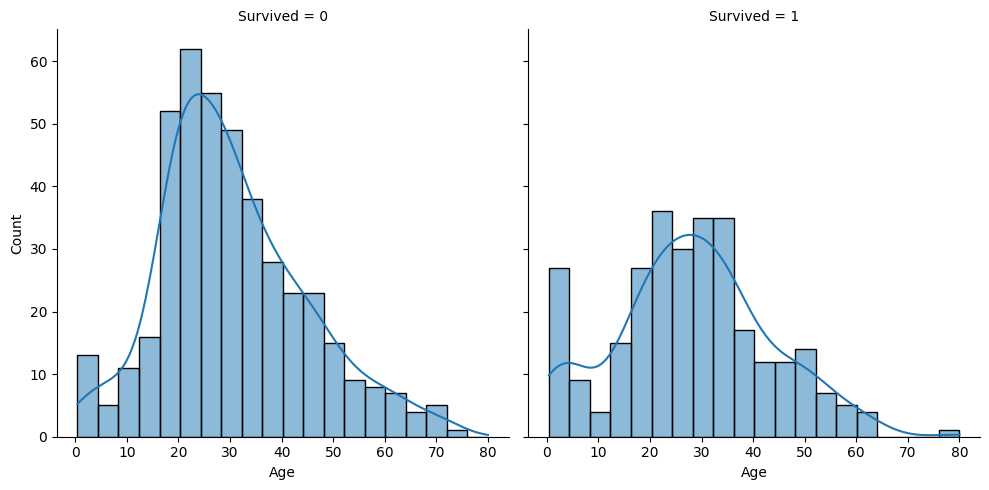

In [13]:
sns.displot(train,x="Age",col="Survived",kde=True)

Fare distribution

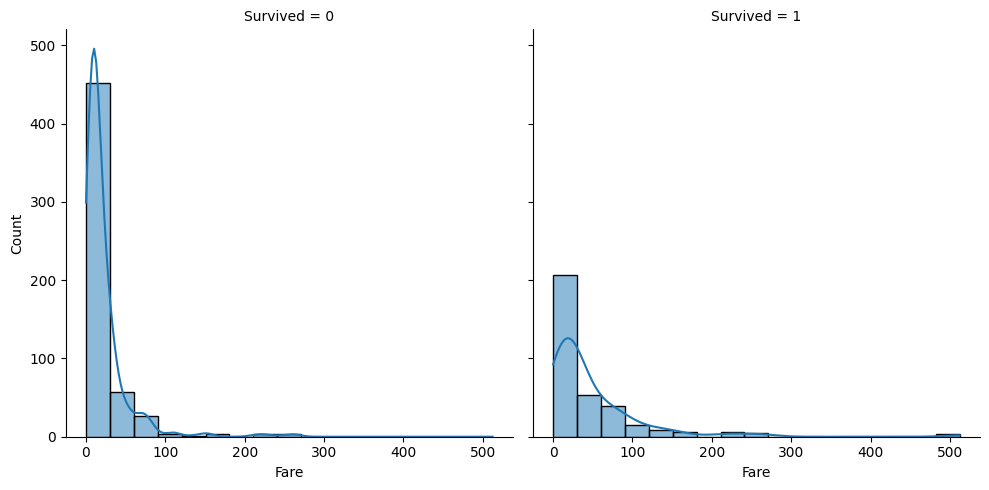

In [14]:
sns.displot(train,x="Fare",col="Survived",binwidth=30,height=5,kde=True)

Here I'm trying to get the Title and simplify it to class that title is belong to.

In [15]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [16]:
train["Title"]=train["Name"].str.split(pat=',',expand=True)[1].str.split(pat='.',expand=True)[0].apply(lambda x:x.strip())

test["Title"]=test["Name"].str.split(pat=',',expand=True)[1].str.split(pat='.',expand=True)[0].apply(lambda x:x.strip())

In [17]:
train.groupby(["Title"],as_index=False)["Survived"].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


Military: Capt, Col, Major
Noble: Jonkheer, the Countess, Don, Lady, Sir
Unmarried women: Mlle, Miss, Mme

In [18]:
train["Title"]=train["Title"].replace({
    "Capt": "Military",
    "Col":"Military",
    "Major":"Military",
    "Jonkheer":"Noble",
    "the Countess":"Noble",
    "Don":"Noble",
    "Lady":"Noble",
    "Sir":"Noble",
    "Mlle": "Unmarried women",
    "Miss":"Unmarried women",
    "Mme":"Unmarried women"
})

In [19]:
train.groupby(["Title"],as_index=False)["Survived"].agg(["mean","count"])

,Title,mean,count
0,Dr,0.428571,7
1,Master,0.575000,40
2,Military,0.400000,5
3,Mr,0.156673,517
4,Mrs,0.792000,125
5,Ms,1.000000,1
6,Noble,0.600000,5
7,Rev,0.000000,6
8,Unmarried women,0.702703,185


Some interesting pattern)

In [20]:
train["Name_Length"]=train["Name"].apply(lambda x:len(x))

test["Name_Length"]=test["Name"].apply(lambda x:len(x))

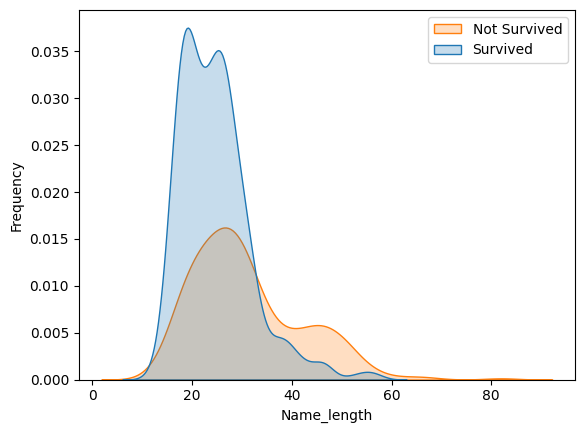

In [21]:
g=sns.kdeplot(train[train["Name_Length"].notnull()],x="Name_Length",hue="Survived",fill=True)
g.set_xlabel("Name_length")
g.set_ylabel("Frequency")
g=g.legend(['Not Survived','Survived'])

Here I'm trying to get ticket number,count people who has the same ticket number(I think may be they lived together) and trying to get the location of their cabin from ticket.

In [22]:
train["Ticket_Number"]=train["Ticket"].apply(lambda x: pd.Series({'Ticket':x.split()[-1]}))

test["Ticket_Number"]=test["Ticket"].apply(lambda x: pd.Series({'Ticket':x.split()[-1]}))

In [23]:
train.groupby(["Ticket_Number"],as_index=False)['Survived'].agg(['mean','count']).sort_values('count')

,Ticket_Number,mean,count
0,10482,1.000000,1
428,345364,0.000000,1
429,345572,1.000000,1
430,345763,0.000000,1
432,345765,0.000000,1
...,...,...,...
168,2144,0.000000,6
468,347088,0.000000,6
464,347082,0.000000,7
196,2343,0.000000,7


In [24]:
train["Ticket_Number_Counts"]=train.groupby("Ticket_Number")["Ticket_Number"].transform('count')
test["Ticket_Number_Counts"]=test.groupby("Ticket_Number")["Ticket_Number"].transform('count')

In [25]:
train.groupby(["Ticket_Number_Counts"],as_index=False)['Survived'].agg(['mean','count']).sort_values('count')

,Ticket_Number_Counts,mean,count
4,5,0.000000,10
5,6,0.000000,18
6,7,0.238095,21
3,4,0.500000,44
2,3,0.712121,66
1,2,0.569149,188
0,1,0.295956,544


In [26]:
train['Ticket_loc']=np.where(train['Ticket'].str.split(pat=' ',expand=True)[1].notna(),train['Ticket'].str.split(pat=' ',expand=True)[0].apply(lambda x:x.strip()),'no')
test['Ticket_loc']=np.where(test['Ticket'].str.split(pat=' ',expand=True)[1].notna(),test['Ticket'].str.split(pat=' ',expand=True)[0].apply(lambda x:x.strip()),'no')

In [27]:
train['Ticket_loc'].value_counts()

Ticket_loc
no            665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

It's kinda "dirty", so lets delete some symbols.

In [28]:
train["Ticket_loc"]=train["Ticket_loc"].apply(lambda x:str(x).upper().replace('.','').replace('/',''))
test["Ticket_loc"]=test["Ticket_loc"].apply(lambda x:str(x).upper().replace('.','').replace('/',''))

In [29]:
train.groupby(["Ticket_loc"],as_index=False)["Survived"].agg(['mean','count'])

,Ticket_loc,mean,count
0,A4,0.000000,7
1,A5,0.095238,21
2,AS,0.000000,1
3,C,0.400000,5
4,CA,0.341463,41
5,CASOTON,0.000000,1
6,FA,0.000000,1
7,FC,0.000000,1
8,FCC,0.800000,5
9,NO,0.383459,665


Getting the Сabin class

In [30]:
train["Cabin"]=train["Cabin"].fillna("U")
train["Cabin"]=pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train["Cabin"]])

test["Cabin"]=test["Cabin"].fillna("U")
test["Cabin"]=pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test["Cabin"]])

In [31]:
train.groupby(["Cabin"],as_index=False)["Survived"].agg(['mean','count'])

,Cabin,mean,count
0,A,0.466667,15
1,B,0.744681,47
2,C,0.593220,59
3,D,0.757576,33
4,E,0.750000,32
5,F,0.615385,13
6,G,0.500000,4
7,T,0.000000,1
8,U,0.299854,687


In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title,Name_Length,Ticket_Number,Ticket_Number_Counts,Ticket_loc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,2,Mr,23,21171,1,A5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,Mrs,51,17599,1,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,Unmarried women,22,3101282,1,STONO2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Mrs,44,113803,2,NO
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,Mr,24,373450,1,NO


Some correlations

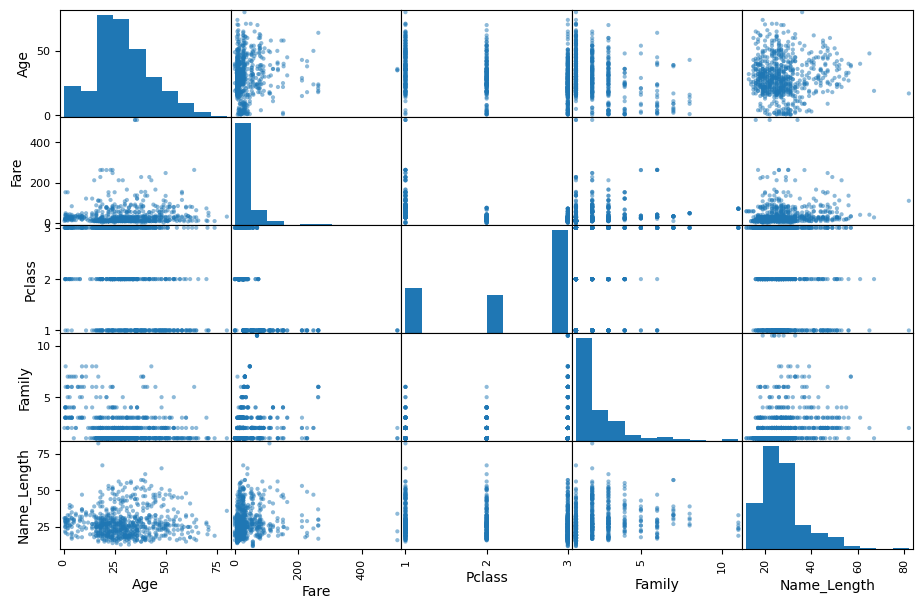

In [33]:
atr=['Age','Fare','Pclass','Family','Name_Length']

scatter_matrix(train[atr],figsize=(11,7))
plt.show()

<Axes: >

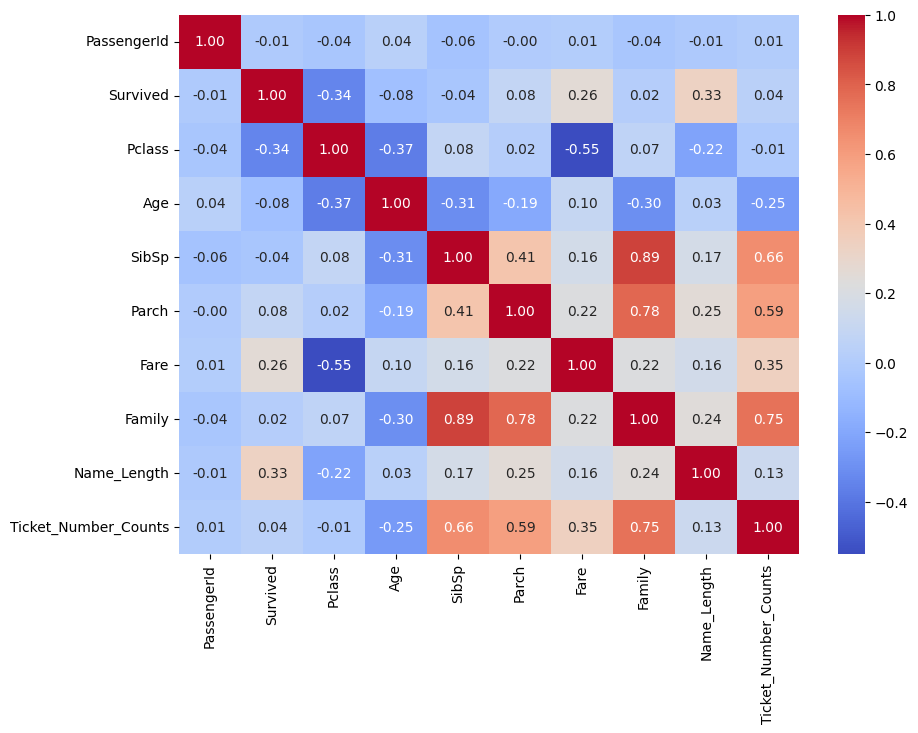

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='.2f')

We see strong correllation between family and SibSp,Parch. Let's drop them and keep Family instead.

## 3.Pipeline

In [35]:
train.shape

(891, 18)

In [36]:
test.shape

(418, 17)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           891 non-null    int64  
 1   Survived              891 non-null    int64  
 2   Pclass                891 non-null    int64  
 3   Name                  891 non-null    object 
 4   Sex                   891 non-null    object 
 5   Age                   714 non-null    float64
 6   SibSp                 891 non-null    int64  
 7   Parch                 891 non-null    int64  
 8   Ticket                891 non-null    object 
 9   Fare                  891 non-null    float64
 10  Cabin                 891 non-null    object 
 11  Embarked              889 non-null    object 
 12  Family                891 non-null    int64  
 13  Title                 891 non-null    object 
 14  Name_Length           891 non-null    int64  
 15  Ticket_Number         8

In [38]:
ord_cols=['Family','Title']
ohe_cols=['Sex','Embarked']

In [39]:
train.isnull().sum()

PassengerId               0
Survived                  0
Pclass                    0
Name                      0
Sex                       0
Age                     177
SibSp                     0
Parch                     0
Ticket                    0
Fare                      0
Cabin                     0
Embarked                  2
Family                    0
Title                     0
Name_Length               0
Ticket_Number             0
Ticket_Number_Counts      0
Ticket_loc                0
dtype: int64

In [40]:
test.isnull().sum()

PassengerId              0
Pclass                   0
Name                     0
Sex                      0
Age                     86
SibSp                    0
Parch                    0
Ticket                   0
Fare                     1
Cabin                    0
Embarked                 0
Family                   0
Title                    0
Name_Length              0
Ticket_Number            0
Ticket_Number_Counts     0
Ticket_loc               0
dtype: int64

In [41]:
train['Age'].fillna(test['Age'].median(),inplace=True)
test['Age'].fillna(test['Age'].median(),inplace=True)
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [42]:
X=train.drop(['Survived'],axis=1)
y=train['Survived']

Pipeleine!

In [43]:
ordinal=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ord',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

onehot=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

Column=ColumnTransformer(transformers=[
    ('impute',SimpleImputer(strategy='most_frequent'),['Age']),
    ('ord_p',ordinal,ord_cols),
    ('ohe_p',onehot,ohe_cols),
    ('pass','passthrough',['Pclass','Name_Length','Age','Fare','Ticket_Number_Counts'])],
    remainder='drop',
    n_jobs=-1
)

In [44]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

Random Forest

In [45]:
rfc=RandomForestClassifier()

In [46]:
grid={
    'n_estimators':[200,300,350],
    'min_samples_split':[5,10,15],
    'max_depth':[10,15,20],
    'min_samples_leaf':[2,4,6],
    'criterion':['gini','entropy']
}

In [47]:
CV_rfc=GridSearchCV(estimator=rfc,param_grid=grid,cv=StratifiedKFold(n_splits=5))

In [48]:
pipe_rfc=make_pipeline(Column,CV_rfc)
pipe_rfc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family', 'Title']),
                                                 ('ohe_p',
                                                  Pipeline(steps=[('impute',
                                                                   Sim...
                                                 ('pass', 'passthrough',
                                                  ['Pclass', 'Name_Length',
                                                   'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 15, 20],
                                          'min_samples_leaf': [2, 4, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [200, 300, 350]}))])

In [49]:
s_rfc=CV_rfc.best_score_
print(s_rfc)
print(CV_rfc.best_params_)

0.8371614301191765
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 350}


Decision Tree

In [50]:
dtc=DecisionTreeClassifier()

In [51]:
grid={
    'min_samples_split':[5,10,15],
    'max_depth':[10,15,20,30],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

In [52]:
CV_dtc=GridSearchCV(estimator=dtc,param_grid=grid,cv=StratifiedKFold(n_splits=5))

In [53]:
pipe_dtc=make_pipeline(Column,CV_dtc)
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family', 'Title']),
                                                 ('ohe_p',
                                                  Pipeline(steps=[('impute',
                                                                   Sim...
                                                  ['Sex', 'Embarked']),
                                                 ('pass', 'passthrough',
                                                  ['Pclass', 'Name_Length',
                                                   'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 15, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [54]:
s_dtc=CV_dtc.best_score_
print(s_dtc)
print(CV_dtc.best_params_)

0.81185856397124
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


KNN

In [55]:
knn=KNeighborsClassifier()

In [56]:
grid={
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'p':[1,2]
}

In [57]:
CV_knn=GridSearchCV(estimator=knn,param_grid=grid,cv=StratifiedKFold(n_splits=5))

In [58]:
pipe_knn=make_pipeline(Column,CV_knn)
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family', 'Title']),
                                                 ('ohe_p',
                                                  Pipeline(steps=[('impute',
                                                                   Sim...
                                                  ['Sex', 'Embarked']),
                                                 ('pass', 'passthrough',
                                                  ['Pclass', 'Name_Length',
                                                   'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [59]:
s_knn=CV_knn.best_score_
print(s_knn)
print(CV_knn.best_params_)

0.778193637348567
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


Support Vector Classiffication

In [60]:
svc=SVC(probability=True)

In [61]:
grid={
    'C':[10,0.1,0.01],
    'kernel':['linear','rbf','sigmoid']
}

In [62]:
CV_svc=GridSearchCV(estimator=svc,param_grid=grid,cv=StratifiedKFold(n_splits=5))

In [63]:
pipe_svc=make_pipeline(Column,CV_svc)
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family', 'Title']),
                                                 ('ohe_p',
                                                  Pipeline(steps=[('impute',
                                                                   Sim...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('pass', 'passthrough',
                                                  ['Pclass', 'Name_Length',
                                                   'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(probability=True),
                              param_grid={'C': [10, 0.1, 0.01],
                                          'kernel': ['linear', 'rbf',
                                                     'sigmoid']}))])

In [64]:
s_svc=CV_svc.best_score_
print(s_svc)
print(CV_svc.best_params_)

0.7935979513444302
{'C': 10, 'kernel': 'linear'}


Logstic Regression

In [65]:
LR=LogisticRegression(max_iter=1000)

In [66]:
grid={
    'C':[100,10,1,0.1,0.01,0.01],
}

In [67]:
CV_LR=GridSearchCV(estimator=LR,param_grid=grid,cv=StratifiedKFold(n_splits=5))

In [68]:
pipe_LR=make_pipeline(Column,CV_LR)
pipe_LR.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family', 'Title']),
                                                 ('ohe_p',
                                                  Pipeline(steps=[('impute',
                                                                   Sim...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('pass', 'passthrough',
                                                  ['Pclass', 'Name_Length',
                                                   'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(max_iter=1000),
                              param_grid={'C': [100, 10, 1, 0.1, 0.01,
                                                0.01]}))])

In [69]:
s_LR=CV_LR.best_score_
print(s_LR)
print(CV_LR.best_params_)

0.8090810597852853
{'C': 1}


XGBoost

In [70]:
xgb=XGBClassifier()

In [71]:
grid = { 
        'n_estimators':[200,300,400],
        'learning_rate':[0.1,0.3,0.5],
        'booster':['gbtree','gblinear','dart']
       }

In [72]:
CV_xgb=GridSearchCV(estimator=xgb,param_grid=grid,cv=StratifiedKFold(n_splits=5))

In [73]:
pipe_xgb=make_pipeline(Column,CV_xgb)
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family', 'Title']),
                                                 ('ohe_p',
                                                  Pipeline(steps=[('impute',
                                                                   Sim...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              param_grid={'booster': ['gbtree', 'gblinear',
                                                      'dart'],
                                          'learning_rate': [0.1, 0.3, 0.5],
                                          'n_estimators': [200, 300, 400]}))])

In [74]:
s_xgb=CV_xgb.best_score_
print(s_xgb)
print(CV_xgb.best_params_)

0.8174332709543979
{'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 400}


In [76]:
pred1=pipe_rfc.predict(test)
pred2=pipe_dtc.predict(test)
pred3=pipe_knn.predict(test)
pred4=pipe_svc.predict(test)
pred5=pipe_LR.predict(test)
pred6=pipe_xgb.predict(test)

In [78]:
subm1=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':pred1
})
subm2=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':pred2
})
subm3=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':pred3
})
subm4=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':pred4
})
subm5=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':pred5
})
subm6=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':pred6
})

In [80]:
subm1.to_csv('subm1.csv',index=False)
subm2.to_csv('subm2.csv',index=False)
subm3.to_csv('subm3.csv',index=False)
subm4.to_csv('subm4.csv',index=False)
subm5.to_csv('subm5.csv',index=False)
subm6.to_csv('subm6.csv',index=False)